# Stock Market Analysis
In this project, I will explore the stock market data for some tech giants. I am particularly interested in Microsoft's stock.

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import datetime
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Pull stock data from 'Yahoo Finance'

msft = pdr.get_data_yahoo('MSFT', 
                          start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2019, 12, 31))

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2019, 12, 31))

goog = pdr.get_data_yahoo('GOOG', 
                          start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2019, 12, 31))


amzn = pdr.get_data_yahoo('AMZN', 
                          start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2019, 12, 31))

tsla = pdr.get_data_yahoo('TSLA', 
                          start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2019, 12, 31))

In [3]:
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,99.646614
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,95.980820
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,100.444817
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,100.572922
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,101.302139


In [4]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-01-02 to 2019-12-31
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


In [5]:
# basic statistical details
msft.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,131.230953,129.303849,130.339048,130.382024,2.458263e+07,129.538911
std,14.927131,14.944055,14.995333,14.900505,7.702381e+06,15.319982
min,100.190002,97.199997,99.550003,97.400002,8.989200e+06,95.980820
25%,119.912497,118.484997,119.307499,119.340000,1.840832e+07,118.103382
50%,136.099998,133.575005,134.970001,135.220001,2.374750e+07,134.314178
75%,140.365002,138.250000,139.667503,139.177498,2.842352e+07,138.638260
max,159.550003,158.220001,159.449997,158.960007,5.563640e+07,158.960007


## Change in Stock's price over time

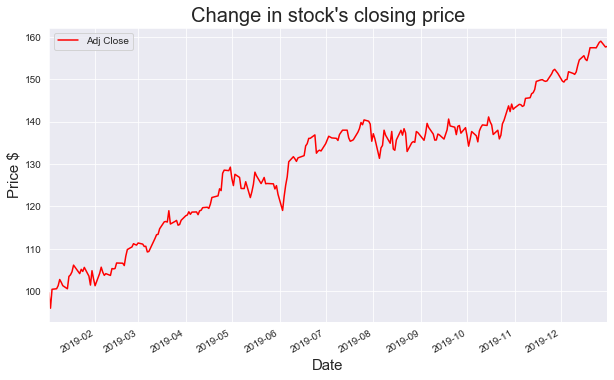

In [6]:
plt.figure(figsize=(10,6))
msft['Adj Close'].plot(legend=True, color='Red')
plt.title("Change in stock's closing price", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Price $", fontsize=15)
plt.show()

Stock's price has increasing trend since the begining of the year and reaching at it's peak by the end of December.

Let's plot the change in stock's volume over time, where volume is the number of shares being traded during a given day.

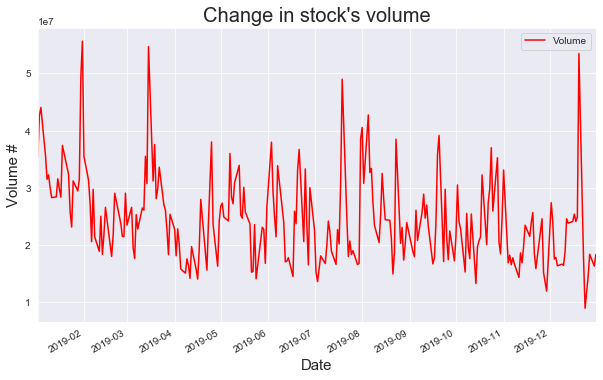

In [7]:
plt.figure(figsize=(10,6))
msft['Volume'].plot(legend=True, color='Red')
plt.title("Change in stock's volume", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Volume #", fontsize=15)
plt.show()

## Moving averages (MA)
We will compute the moving average for stocks over a $10$, $20$, and $50$ days interval and add them as columns to our dataframe for further analysis.

In [8]:
ma_days = [10,20,50]
for ma in ma_days:
    new_columns = "MA for %s days" %(str(ma))
    msft[new_columns] = msft['Adj Close'].rolling(ma).mean()

In [9]:
msft.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,157.380005,155.197002,153.029002,147.617809
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,158.669998,155.894002,153.361002,147.969411
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,158.960007,156.466002,153.693002,148.349934
2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,157.589996,156.772002,154.003501,148.717409
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,157.699997,156.989001,154.411001,149.132528


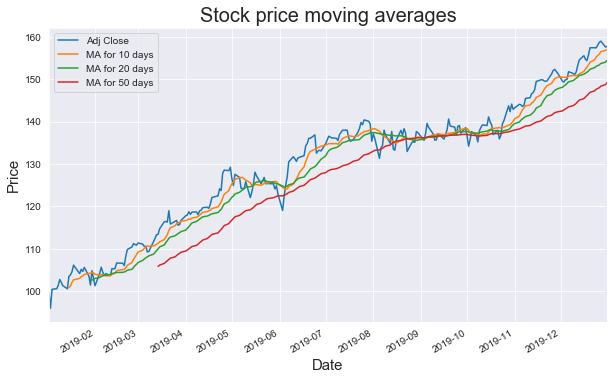

In [10]:
msft[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,6))
plt.title("Stock price moving averages", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

We see an upward trend in price in all three cases. The MA for $50$ days has a smoother plot as it is less affected by the daily fluctuations.

## Daily Return
Let's check out the daily return of Microsoft's stock. The daily return is calculated using Pandas pct_change() function over 'Adj Close'. 

In [11]:
# daily return of a stock
msft['Daily Return'] = msft['Adj Close'].pct_change()

In [12]:
msft['Daily Return'].tail()

Date
2019-12-24   -0.000191
2019-12-26    0.008197
2019-12-27    0.001828
2019-12-30   -0.008619
2019-12-31    0.000698
Name: Daily Return, dtype: float64

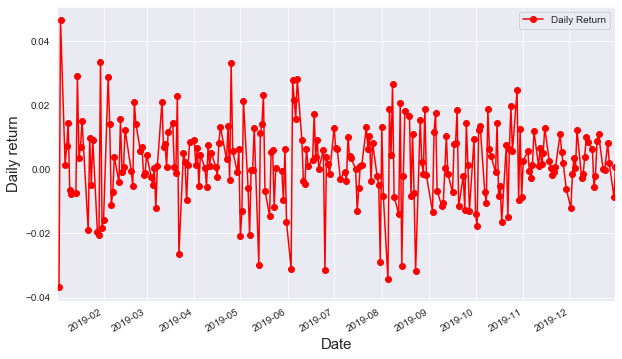

In [13]:
# Plotting the daily return
plt.figure(figsize=(10,6))
msft['Daily Return'].plot(legend=True, color='Red', marker='o')
plt.xlabel("Date", fontsize=15)
plt.ylabel("Daily return", fontsize=15)
plt.show()

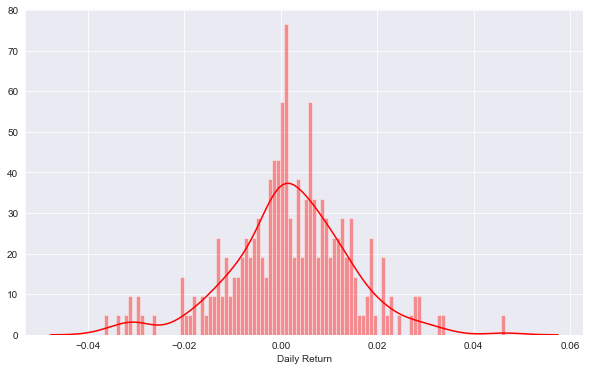

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(msft['Daily Return'].dropna(),bins=100,color='red')
plt.show()

Positive daily returns seem to be slightly more frequent than negative daily returns.

## Correlation between daily returns of different stocks

In [15]:
# Create new dataframe with adjusted close price of different stocks
adj_data = pd.concat([msft['Adj Close'], aapl['Adj Close'], goog['Adj Close'], amzn['Adj Close'], \
                      tsla['Adj Close']], axis=1).dropna()
adj_data.columns = ['MSFT','AAPL','GOOG', 'AMZN','TSLA']
adj_data.head()

,MSFT,AAPL,GOOG,AMZN,TSLA
Date,,,,,
2019-01-02,99.646614,155.582367,1045.849976,1539.130005,310.119995
2019-01-03,95.980820,140.085220,1016.059998,1500.280029,300.359985
2019-01-04,100.444817,146.065353,1070.709961,1575.390015,317.690002
2019-01-07,100.572922,145.740265,1068.390015,1629.510010,334.959991
2019-01-08,101.302139,148.518509,1076.280029,1656.579956,335.350006


In [16]:
# percentage change
pct_change = adj_data.pct_change()

In [17]:
pct_change.tail()

,MSFT,AAPL,GOOG,AMZN,TSLA
Date,,,,,
2019-12-24,-0.000191,0.000951,-0.003914,-0.002114,0.014384
2019-12-26,0.008197,0.019840,0.012534,0.044467,0.013380
2019-12-27,0.001828,-0.000379,-0.006256,0.000551,-0.001299
2019-12-30,-0.008619,0.005935,-0.011650,-0.012253,-0.036433
2019-12-31,0.000698,0.007307,0.000659,0.000514,0.008753


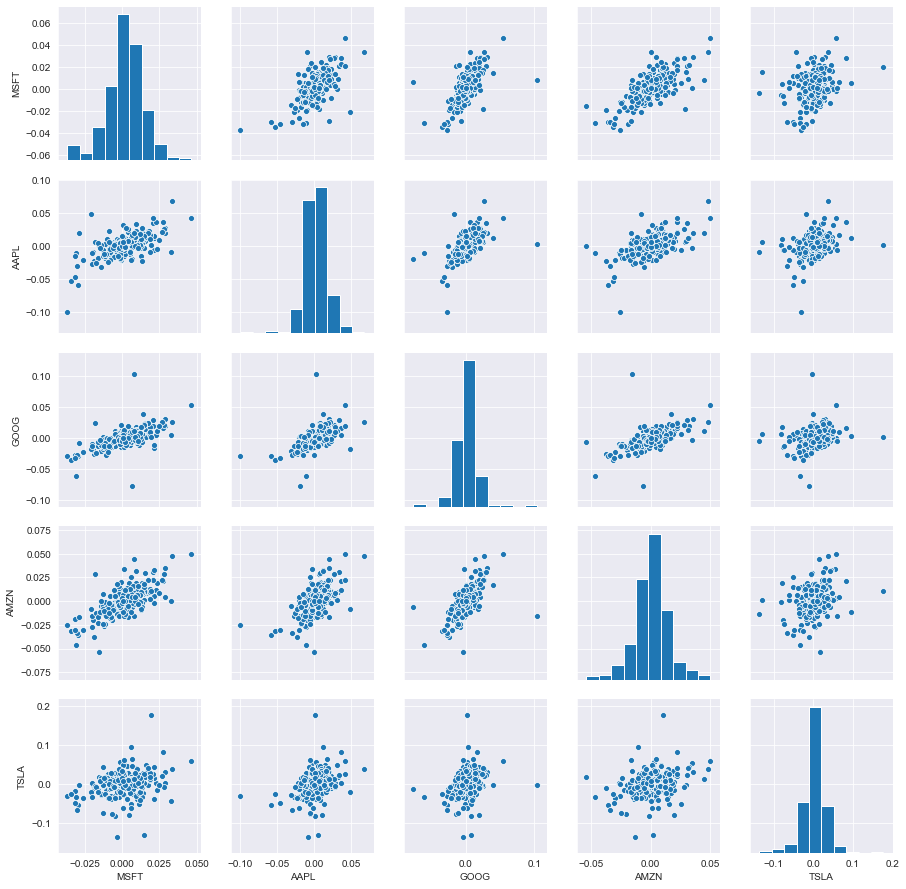

In [18]:
# Let's plot the relationships between each stock pair
ret_fig = sns.pairplot(pct_change.dropna())

To see the numerical values of the correlation coefficients, we can use seaborn's heatmap function.

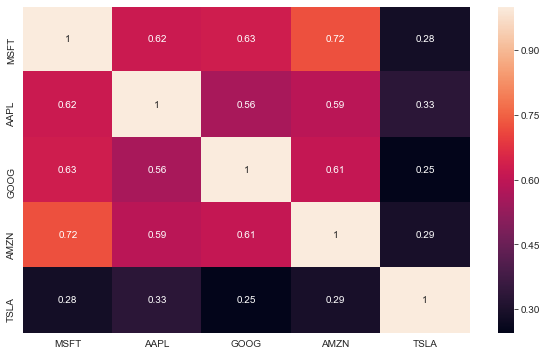

In [19]:
corr_matrix = pct_change.corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(corr_matrix,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Microsoft and Amazon have the highest correlation. Also, notice that all the tech giants are positively correlated.

## Value at Risk
A common way to quantify risk is to compare the expected return to the standard deviation of the daily returns.

In [20]:
var = pct_change.dropna()

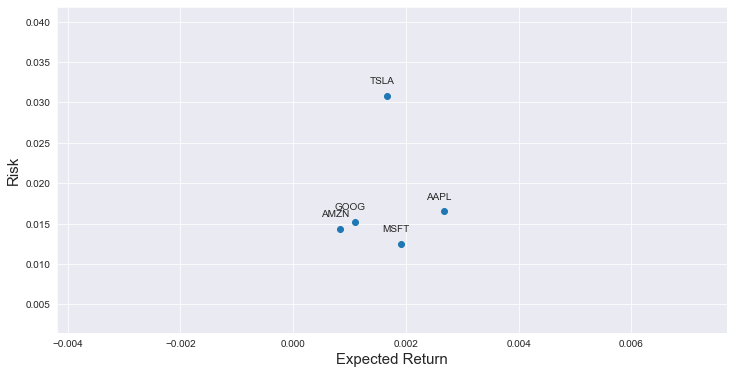

In [21]:
plt.figure(figsize=(12,6))
xs = var.mean()
ys = var.std()
plt.scatter(xs, ys)
plt.xlabel('Expected Return', fontsize=15)
plt.ylabel('Risk', fontsize=15)

# adding annotatios in the scatterplot
for label,x,y in zip(var.columns, xs, ys):
    plt.annotate(label,
    xy=(x,y), xytext=(x-5,y+10),
    textcoords = 'offset points', ha = 'center', va = 'bottom')

We see that Apple's stock has the highest expected return with relatively higher risk. Tesla's stock appears to be highly risky to invest in. On the other hand, Microsoft's stock seem to be the safest option to invest in as it has lowest risk and relatively higher expected return. Amazon, and Google are not bad either to invest in.

#### Let's look at the daily maximum loss for Microsoft's stock

In [22]:
# using Pandas built in qualtile method
#var['MSFT'].quantile(0.05)
print(f"Daily maximum loss = {var['MSFT'].quantile(0.05) * 100:.2f}%")

Daily maximum loss = -1.92%


We can infer with $95\%$ confidence, the maximum daily loss will be at most $1.92\%$.

## Monte Carlo Simulation

A Monte Carlo simulation is an attempt to predict the future many times, and at the end of the simulation produce a distribution of outcomes that can be analyzed. Here, we will be using the Geometric Brownian Motion financial model to run the simulation.

The GMB model:
$ \Delta S = S \times (\mu \Delta t + \sigma  \epsilon \sqrt \Delta t)$

where,
$S=$ the stock price

$\Delta S=$ the change in stock price

$\mu=$ the expected return

$\sigma=$ the standard deviation of returns

$ \epsilon=$ the random variable

$\Delta t=$ the elapsed time period

The first term is a "drift" and the second term is a "shock".

In [23]:
days = 365
dt = 1/365 
mu = var.mean()['MSFT']
sigma = var.std()['MSFT']

In [24]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

Let's run a simulation for $500$ runs.

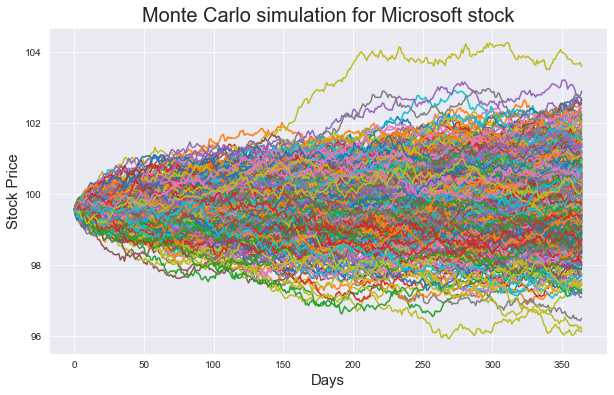

In [25]:
start_price = 99.55 #get this from msft.head()
plt.figure(figsize=(10,6))

for run in range(500):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.title('Monte Carlo simulation for Microsoft stock', fontsize=20)
plt.show()

Let's make a histogtram of $10,000$ simulations.

In [26]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

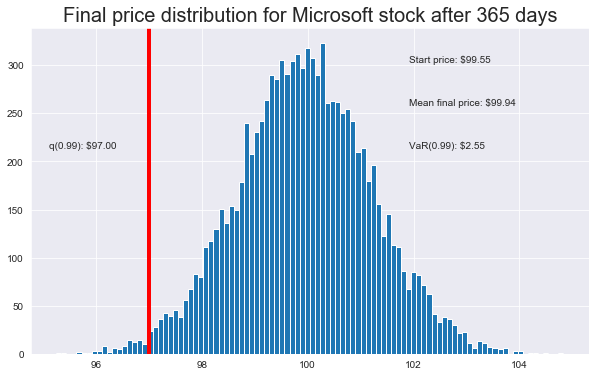

In [27]:
q = np.percentile(simulations,1)

plt.figure(figsize=(10,6))
plt.hist(simulations, bins=100)

plt.figtext(0.65,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.65,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.65,0.6,"VaR(0.99): $%.2f" % (start_price - q))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Microsoft stock after %s days" %days, fontsize=20)
plt.show()

We see that Microsoft's stock price is pretty stable. The average final price over $10,000$ runs is $ \$99.96$, which is slightly higher than the starting price. The red line indicates the value of a stock at risk at a desired confidence interval. In this case, we can infer with $99\%$ confidence that we would be risking $\$2.55$ per share.

---